# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [1]:
## 오류가 나면 모듈을 설치해야 합니다.
## 아마도 아래와 같은 모듈 오류가 있을 겁니다.
# wordcloud 오류, palettable 오류
# 아래 명령어를 복사해서 anaconda prompt에서 수행하세요.
# conda install -c conda-forge wordcloud
# pip install palettable\

import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "Johnson president b" 
icon_path = "%s.png" % icon

### 데이터 입력

In [3]:
# 연설문1
# 아래 KoreaSummit_Moon.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("speech.txt", 'r', encoding='euc-kr')
message_of_moon = f.read()
print(message_of_moon)
f.close()

하원의장, 상원의장, 의원 여러분:

오늘 밤 나는 인간의 존엄성과 민주주의의 운명을 위해 이야기하고자 합니다. 양 당의 모든 당원과, 종교와 피부색을 초월한 모든 미국 국민과, 미국의 각계각층이 나와 함께 이 일에 나서 주실 것을 촉구하는 바입니다. 때로 역사와 운명이 같은 때 같은 장소에서 만나 자유를 향한 인류의 끊임없는 노력에서 전환점이 됩니다. 렉싱턴과 콩코드가 그랬고, 한 세기 전에 애포매턱스(Appomattox)가 그랬으며, 지난 주 앨러배마 주 셀마가 그랬습니다. 셀마에서는 오랫동안 고통 받고 있는 사람들이 미국 국민으로서의 권리를 거부 당한 것에 대해 평화적으로 항의했습니다. 그중 많은 사람들이 잔인하게 폭행을 당했습니다. 선량한 시민이자 주님의 아들 한 사람이 목숨을 잃었습니다.

셀마에서 일어난 일에서 자부심을 느낄 여지는 없습니다. 수백만에 달하는 미국 국민들에게 평등한 권리를 오랫동안 인정하지 않은 것에 대해 만족할 이유도 없습니다. 그러나, 오늘 밤 여기에서 일어나고 있는 일을 보면 민주주의에 대해 희망과 믿음을 가질 이유가 충분합니다. 억압 받는 사람들의 고통의 외침과, 찬송가와 항의를 듣고, 이 위대한 정부, 즉 지구상에서 가장 위대한 국가의 정부의 의원들이 한 자리에 모였습니다.

우리의 사명은 이 나라의 가장 오랜 사명이자 가장 기본적인 사명입니다. 잘못을 바로잡고, 정의를 실현하고, 국민에 봉사하는 사명입니다. 우리 시대에 우리는 커다란 위기의 순간을 맞으며 살고 있습니다. 우리의 삶은 전쟁과 평화의 이슈, 번영과 침체의 이등 중대한 이슈에 대한 토론으로 점철되어 왔습니다. 그러나, 어떠한 이슈가 미국 자신의 감춰진 마음을 적나라하게 드러낸 경우는 드뭅니다. 또, 성장이나 풍요, 복지나 안보가 아니라, 사랑하는 조국의 가치와 목적과 의미에 대한 도전을 받는 것도 드문 일입니다.

미국의 흑인들에게 평등한 권리를 줄 것인가 하는 문제가 바로 그러한 문제입니다. 우리가 모든 적을 무찌르고, 부를 두 배로 늘리고, 별을 정복하더라도

## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



# 남북정상회담 두 정상의 대화문 워드 클라우드
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [4]:
# 연설문 1번 전처리
message_of_moon = message_of_moon.split('\n\n')
message_of_moon

['하원의장, 상원의장, 의원 여러분:',
 '오늘 밤 나는 인간의 존엄성과 민주주의의 운명을 위해 이야기하고자 합니다. 양 당의 모든 당원과, 종교와 피부색을 초월한 모든 미국 국민과, 미국의 각계각층이 나와 함께 이 일에 나서 주실 것을 촉구하는 바입니다. 때로 역사와 운명이 같은 때 같은 장소에서 만나 자유를 향한 인류의 끊임없는 노력에서 전환점이 됩니다. 렉싱턴과 콩코드가 그랬고, 한 세기 전에 애포매턱스(Appomattox)가 그랬으며, 지난 주 앨러배마 주 셀마가 그랬습니다. 셀마에서는 오랫동안 고통 받고 있는 사람들이 미국 국민으로서의 권리를 거부 당한 것에 대해 평화적으로 항의했습니다. 그중 많은 사람들이 잔인하게 폭행을 당했습니다. 선량한 시민이자 주님의 아들 한 사람이 목숨을 잃었습니다.',
 '셀마에서 일어난 일에서 자부심을 느낄 여지는 없습니다. 수백만에 달하는 미국 국민들에게 평등한 권리를 오랫동안 인정하지 않은 것에 대해 만족할 이유도 없습니다. 그러나, 오늘 밤 여기에서 일어나고 있는 일을 보면 민주주의에 대해 희망과 믿음을 가질 이유가 충분합니다. 억압 받는 사람들의 고통의 외침과, 찬송가와 항의를 듣고, 이 위대한 정부, 즉 지구상에서 가장 위대한 국가의 정부의 의원들이 한 자리에 모였습니다.',
 '우리의 사명은 이 나라의 가장 오랜 사명이자 가장 기본적인 사명입니다. 잘못을 바로잡고, 정의를 실현하고, 국민에 봉사하는 사명입니다. 우리 시대에 우리는 커다란 위기의 순간을 맞으며 살고 있습니다. 우리의 삶은 전쟁과 평화의 이슈, 번영과 침체의 이등 중대한 이슈에 대한 토론으로 점철되어 왔습니다. 그러나, 어떠한 이슈가 미국 자신의 감춰진 마음을 적나라하게 드러낸 경우는 드뭅니다. 또, 성장이나 풍요, 복지나 안보가 아니라, 사랑하는 조국의 가치와 목적과 의미에 대한 도전을 받는 것도 드문 일입니다.',
 '미국의 흑인들에게 평등한 권리를 줄 것인가 하는 문제가 바로 그러한 문제입니다. 우리가 모든 적을 무찌르고, 부를 두 배로 

In [5]:
# 연설문 1번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message_of_moon)
tf_bow1 = tf_vectorizer.fit_transform(message_of_moon)
tf_bow1

<42x1497 sparse matrix of type '<class 'numpy.int64'>'
	with 2160 stored elements in Compressed Sparse Row format>

In [6]:
# 연설문 1 
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

1497
1497


['1928년',
 '1965년에',
 '20년',
 '3개',
 '50개',
 '5대호',
 '8개월',
 '8개월을',
 'annuit',
 'appomattox',
 'coeptis',
 'favored',
 'fbi와',
 'god',
 'has',
 'mcculloch',
 'our',
 'undertaking',
 '가기',
 '가난',
 '가난과',
 '가난의',
 '가난한',
 '가난했고',
 '가능',
 '가르친',
 '가리지',
 '가면',
 '가면서',
 '가볍게',
 '가장',
 '가져야',
 '가족을',
 '가족이',
 '가지게',
 '가지고',
 '가지는',
 '가진',
 '가질',
 '가치에',
 '가치와',
 '가해져',
 '가해질',
 '각계각층이',
 '각자가',
 '각자에게도',
 '각자의',
 '간단합니다',
 '간에',
 '간의',
 '감사합니다',
 '감정인지를',
 '감춰진',
 '갔다가',
 '갔으며',
 '강력한',
 '강화하고',
 '같은',
 '개방하기',
 '개방하십시오',
 '개요가',
 '개혁을',
 '거라고',
 '거라고는',
 '거라는',
 '거부',
 '거부권을',
 '거부하는',
 '거부할',
 '거부해서도',
 '거실에',
 '거의',
 '거주자',
 '거친',
 '건강한',
 '건설하거나',
 '건설하기',
 '걸어',
 '검토를',
 '것과',
 '것과도',
 '것도',
 '것들을',
 '것뿐이었고',
 '것뿐입니다',
 '것에',
 '것으로',
 '것은',
 '것을',
 '것이',
 '것이라는',
 '것이며',
 '것이었습니다',
 '것인가',
 '것임을',
 '것입니다',
 '것처럼',
 '겉만',
 '겪을',
 '결국',
 '결론에',
 '결정합니다',
 '결집할',
 '결코',
 '경계할',
 '경우',
 '경우는',
 '경우도',
 '경우에는',
 '경찰과',
 '경험에',
 '계신',
 '고난을',
 '고민하는',
 '고안할',
 '고인들을',
 '고통',
 '고통의',
 '곳과',


In [7]:
# 연설문 1
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['1928년', '1965년에', '20년', '3개', '50개', '5대호', '8개월', '8개월을', 'annuit', 'appomattox', 'coeptis', 'favored', 'fbi와', 'god', 'has', 'mcculloch', 'our', 'undertaking', '가기', '가난', '가난과', '가난의', '가난한', '가난했고', '가능', '가르친', '가리지', '가면', '가면서', '가볍게', '가장', '가져야', '가족을', '가족이', '가지게', '가지고', '가지는', '가진', '가질', '가치에', '가치와', '가해져', '가해질', '각계각층이', '각자가', '각자에게도', '각자의', '간단합니다', '간에', '간의', '감사합니다', '감정인지를', '감춰진', '갔다가', '갔으며', '강력한', '강화하고', '같은', '개방하기', '개방하십시오', '개요가', '개혁을', '거라고', '거라고는', '거라는', '거부', '거부권을', '거부하는', '거부할', '거부해서도', '거실에', '거의', '거주자', '거친', '건강한', '건설하거나', '건설하기', '걸어', '검토를', '것과', '것과도', '것도', '것들을', '것뿐이었고', '것뿐입니다', '것에', '것으로', '것은', '것을', '것이', '것이라는', '것이며', '것이었습니다', '것인가', '것임을', '것입니다', '것처럼', '겉만', '겪을', '결국', '결론에', '결정합니다', '결집할', '결코', '경계할', '경우', '경우는', '경우도', '경우에는', '경찰과', '경험에', '계신', '고난을', '고민하는', '고안할', '고인들을', '고통', '고통의', '곳과', '곳에', '곳에서', '곳으로', '곳은', '곳이라면', '공공', '공민권을', '공식', '공통의', '공포에', '공포의', '공허한', '공화당', '공화당원과', '공화당원으로서가', '과거', '과

array([1, 1, 1, ..., 2, 1, 1], dtype=int64)

In [8]:
# 연설문 1
# 단어별 글자수 확인
tf_word_dict1

{'1928년': 1,
 '1965년에': 1,
 '20년': 1,
 '3개': 1,
 '50개': 1,
 '5대호': 1,
 '8개월': 1,
 '8개월을': 1,
 'annuit': 1,
 'appomattox': 1,
 'coeptis': 1,
 'favored': 1,
 'fbi와': 1,
 'god': 1,
 'has': 1,
 'mcculloch': 1,
 'our': 1,
 'undertaking': 1,
 '가기': 1,
 '가난': 1,
 '가난과': 4,
 '가난의': 1,
 '가난한': 1,
 '가난했고': 1,
 '가능': 1,
 '가르친': 1,
 '가리지': 1,
 '가면': 2,
 '가면서': 1,
 '가볍게': 1,
 '가장': 6,
 '가져야': 1,
 '가족을': 1,
 '가족이': 2,
 '가지게': 2,
 '가지고': 4,
 '가지는': 1,
 '가진': 3,
 '가질': 1,
 '가치에': 1,
 '가치와': 1,
 '가해져': 1,
 '가해질': 1,
 '각계각층이': 1,
 '각자가': 1,
 '각자에게도': 1,
 '각자의': 1,
 '간단합니다': 1,
 '간에': 2,
 '간의': 2,
 '감사합니다': 1,
 '감정인지를': 1,
 '감춰진': 1,
 '갔다가': 1,
 '갔으며': 1,
 '강력한': 1,
 '강화하고': 1,
 '같은': 3,
 '개방하기': 1,
 '개방하십시오': 1,
 '개요가': 1,
 '개혁을': 1,
 '거라고': 1,
 '거라고는': 1,
 '거라는': 1,
 '거부': 1,
 '거부권을': 1,
 '거부하는': 1,
 '거부할': 1,
 '거부해서도': 1,
 '거실에': 1,
 '거의': 1,
 '거주자': 1,
 '거친': 1,
 '건강한': 1,
 '건설하거나': 1,
 '건설하기': 1,
 '걸어': 1,
 '검토를': 1,
 '것과': 2,
 '것과도': 1,
 '것도': 2,
 '것들을': 1,
 '것뿐이었고': 1,
 '것뿐입니다': 1,
 '것에': 3,
 '것으로

### 시각화

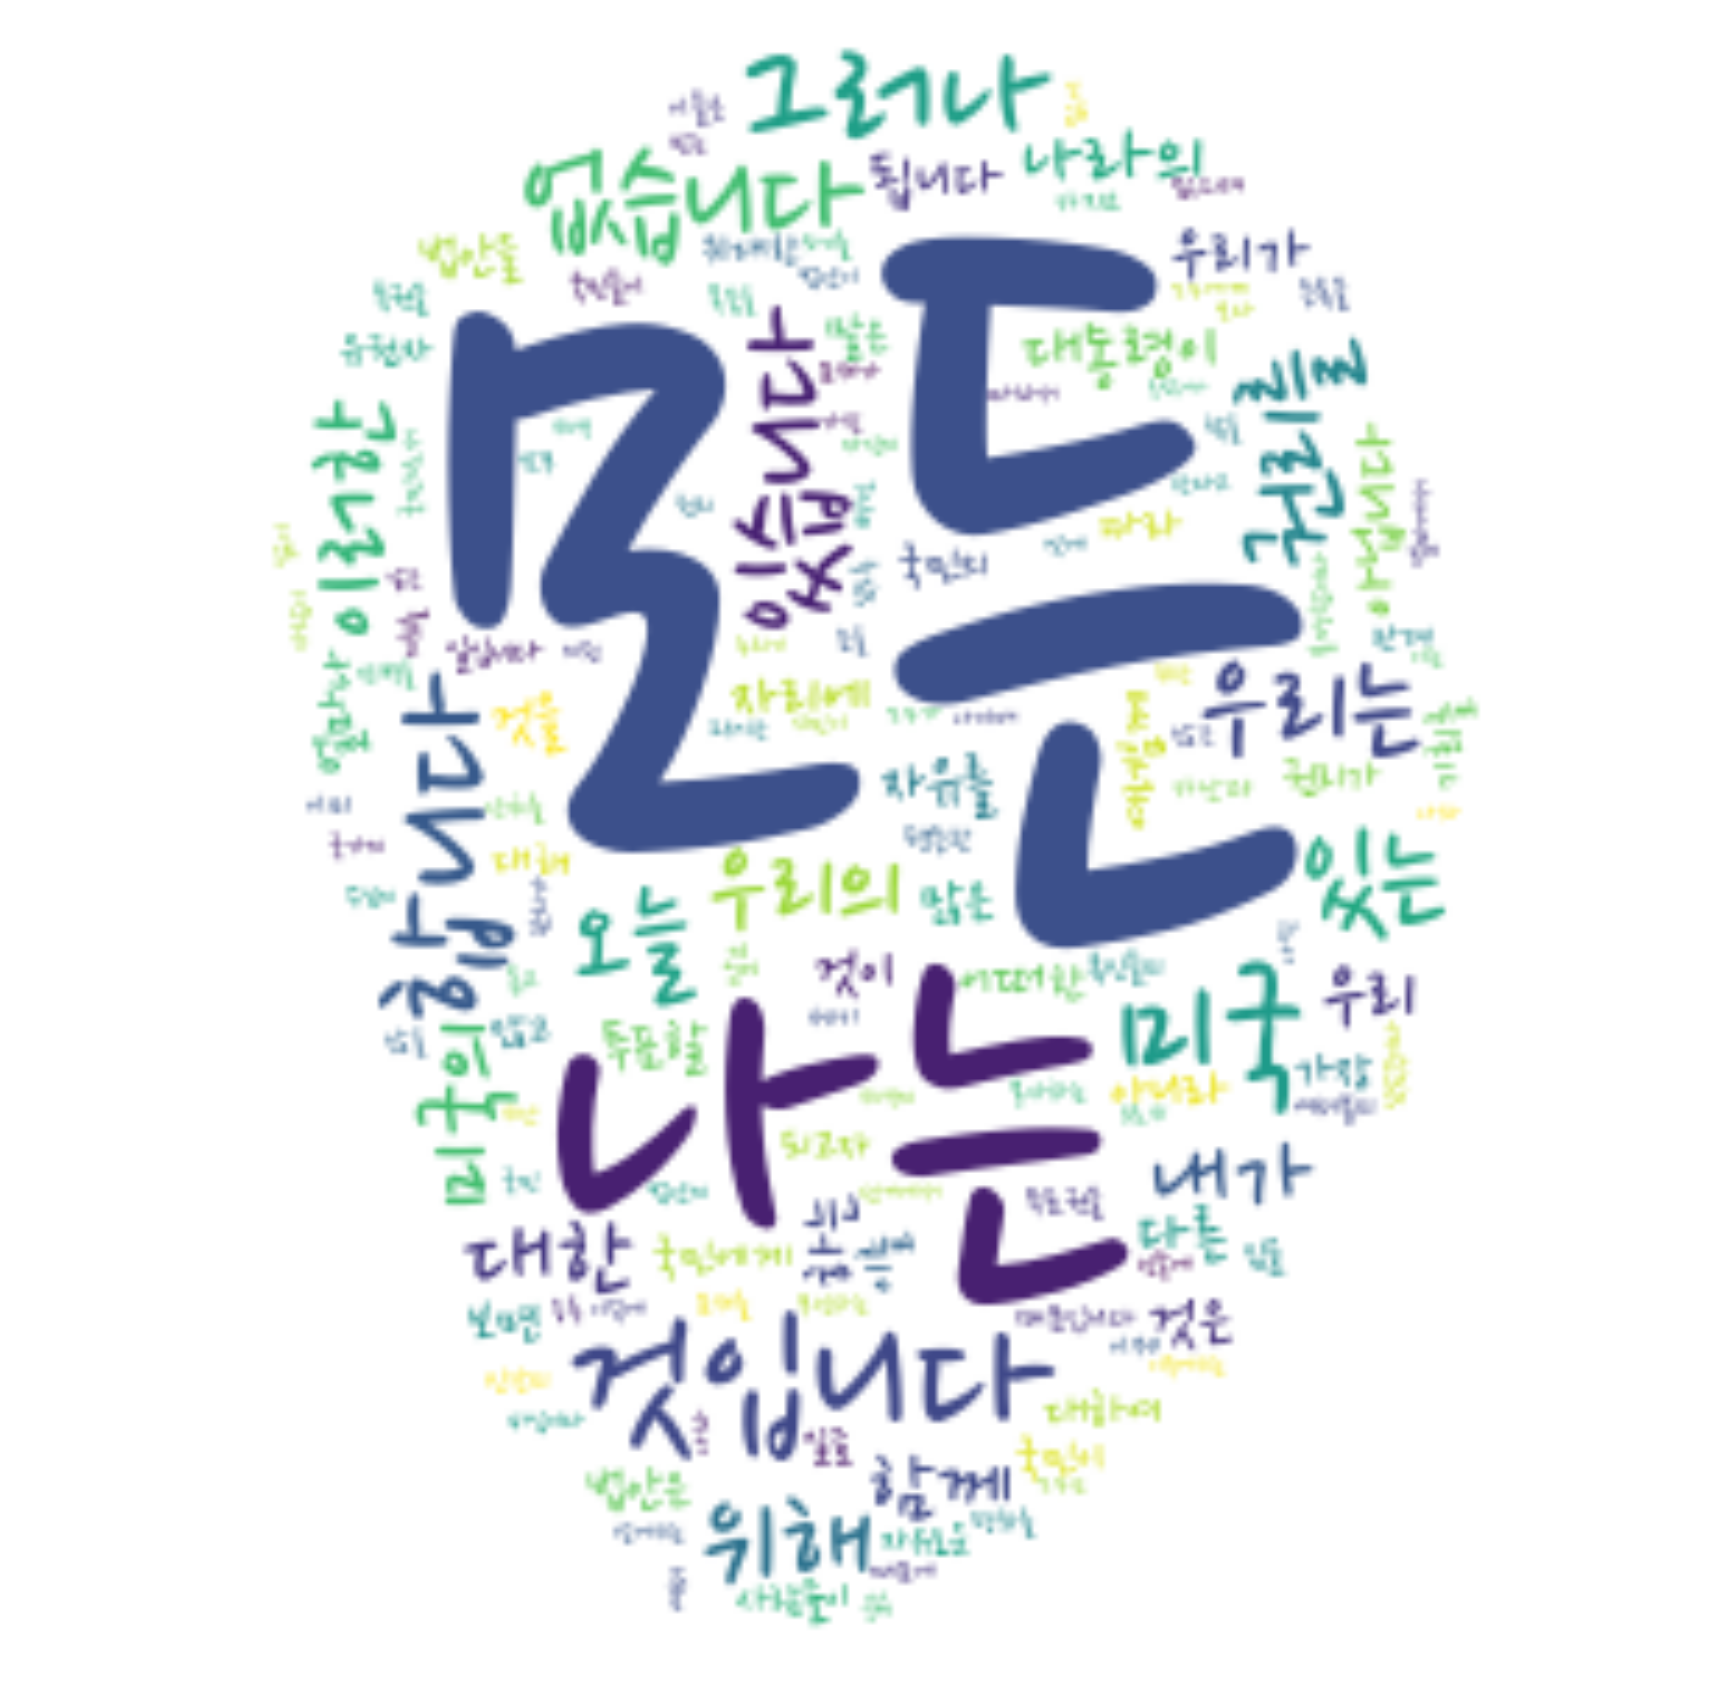

In [9]:
# 연설문 1
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("MoonSpeech.png") # 그림파일로 추출하기